In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(teenconcerns)

In [3]:
str(teenconcerns)

'data.frame':	16 obs. of  4 variables:
 $ Counts : int  4 0 42 57 2 0 7 20 9 4 ...
 $ Sex    : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 1 1 ...
 $ Age    : Factor w/ 2 levels "12-15","16-17": 1 1 1 1 2 2 2 2 1 1 ...
 $ Concern: Factor w/ 4 levels "Healthy","Menstrual",..: 4 2 1 3 4 2 1 3 4 2 ...


In [4]:
teenconcerns

Counts,Sex,Age,Concern
4,M,12-15,Sex
0,M,12-15,Menstrual
42,M,12-15,Healthy
57,M,12-15,Nothing
2,M,16-17,Sex
0,M,16-17,Menstrual
7,M,16-17,Healthy
20,M,16-17,Nothing
9,F,12-15,Sex
4,F,12-15,Menstrual


In [5]:
teenconcerns$Age <- ordered(teenconcerns$Age, levels=c("12-15", "16-17"))

In [6]:
glm.1 <- glm(Counts ~ Sex + Age + Concern, data=teenconcerns, family = poisson(link="log"))

In [7]:
coef(summary(glm.1))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),2.9642302,0.12803022,23.152582,1.369240e-118
SexM,-0.1861023,0.11775001,-1.580486,1.139955e-01
Age.L,-0.6259485,0.09115666,-6.866734,6.568851e-12
ConcernMenstrual,-1.8718022,0.31008681,-6.036381,1.576088e-09
ConcernNothing,0.8306770,0.13567279,6.122650,9.203174e-10
ConcernSex,-1.2656664,0.24140227,-5.242976,1.580070e-07


In [8]:
anova(glm.1, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,15,334.88190,NA
Sex,1,2.508761,14,332.37314,1.132149e-01
Age,1,51.873213,13,280.49993,5.920261e-13
Concern,3,237.323500,10,43.17643,3.608160e-51


In [9]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)

[1] 4.624495e-06

[1] 6.252582e-07

[1] 4.317643

[1] 4.798248

In [10]:
glm.quasi <- glm(Counts ~ Sex + Age + Concern, data=teenconcerns, family = quasipoisson(link="log"))

In [11]:
coef(summary(glm.quasi))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.9642302,0.2804490,10.5695887,9.545174e-07
SexM,-0.1861023,0.2579303,-0.7215217,4.871157e-01
Age.L,-0.6259485,0.1996778,-3.1347930,1.060367e-02
ConcernMenstrual,-1.8718022,0.6792422,-2.7557214,2.027815e-02
ConcernNothing,0.8306770,0.2971899,2.7951047,1.895305e-02
ConcernSex,-1.2656664,0.5287894,-2.3935171,3.773124e-02


In [12]:
anova(glm.quasi, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,15,334.88190,NA,NA
Sex,1,2.508761,14,332.37314,0.5228495,0.486196954
Age,1,51.873213,13,280.49993,10.8108653,0.008177782
Concern,3,237.323500,10,43.17643,16.4868163,0.000337694


In [13]:
gof.dev <- deviance(glm.quasi)
gof.pearson <- sum(glm.quasi$weights * glm.quasi$residuals^2)

pchisq(gof.dev, df=df.residual(glm.quasi), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.quasi), lower.tail = FALSE)

gof.dev / df.residual(glm.quasi)
gof.pearson / df.residual(glm.quasi)

[1] 4.624495e-06

[1] 6.252582e-07

[1] 4.317643

[1] 4.798248


	Shapiro-Wilk normality test

data:  qresid(glm.quasi)
W = 0.93343, p-value = 0.2761


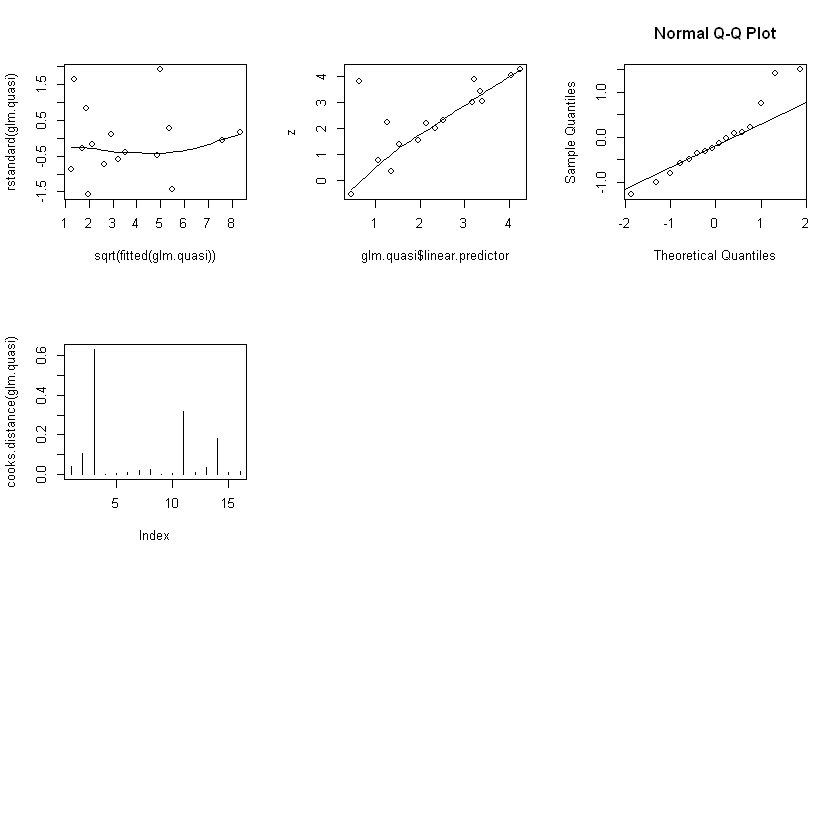

In [14]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.quasi) ~ sqrt(fitted(glm.quasi)))
z <- resid(glm.quasi, type="working") + glm.quasi$linear.predictor
scatter.smooth(z ~ glm.quasi$linear.predictor)
qqnorm(qresid(glm.quasi))
qqline(qresid(glm.quasi))
plot(cooks.distance(glm.quasi), type="h")
shapiro.test(qresid(glm.quasi))

In [15]:
colSums(influence.measures(glm.quasi)$is.inf)
rowSums(influence.measures(glm.quasi)$is.inf)

dfb.1_ dfb.SexM dfb.Ag.L dfb.CncM dfb.CncN dfb.CncS    dffit    cov.r 
       2        1        0        1        2        0        0        6 
  cook.d      hat 
       0        0

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 
 0  1  3  1  0  0  0  1  1  1  2  1  0  0  0  1